In [1]:
import pandas as pd
import numpy as np

In [2]:
from ast import literal_eval

df= pd.read_csv("experiments/training_log.csv")
df['config']= df['config'].apply(literal_eval)
config_df= pd.json_normalize(df['config'])
df = df.drop('config', axis=1).join(config_df)

df.head()

,train_loss,train_accuracy,val_loss,val_accuracy,early_stopping_epoch,model_training_time,num_of_hidden_layers,num_of_hidden_units,learning_rate,optims,activation_function,initialization_method,dropout_percentage,batch_size,epochs,patience
0,1.381555,51.311667,0.021052,53.82,5,29.338231,1,2,0.001,SGD,linear,xavier_uniform,None,64,5,10
1,0.924039,69.405000,0.014822,69.69,327,1962.867275,1,2,0.001,SGD,linear,xavier_uniform,None,64,500,10
2,0.742944,77.660000,0.011195,78.24,11,65.491445,1,4,0.001,SGD,linear,xavier_uniform,None,64,500,10
3,0.586161,83.276667,0.008913,83.89,21,127.662461,1,4,0.001,SGD,linear,xavier_uniform,None,64,500,10
4,0.653644,79.858333,0.009890,80.34,11,66.451666,1,4,0.001,SGD,linear,xavier_uniform,None,64,500,10


In [4]:
df['initialization_method'].unique()

array(['xavier_uniform', 'random_normal', 'zeros', 'xavier_normal',
       'he_uniform', 'random_uniform', 'he_normal', 'ones', 'LeakyReLU'],
      dtype=object)

In [12]:
df.groupby('initialization_method')['val_accuracy'].mean().reset_index().sort_values(by= 'val_accuracy')

,initialization_method,val_accuracy
3,ones,11.022500
5,random_uniform,50.501600
4,random_normal,89.083103
7,xavier_uniform,92.132727
0,LeakyReLU,92.185000
8,zeros,92.693125
1,he_normal,96.502121
6,xavier_normal,96.772941
2,he_uniform,97.516667


In [14]:
df.groupby('activation_function')['val_accuracy'].mean().reset_index().sort_values(by='val_accuracy')

,activation_function,val_accuracy
5,Sigmoid,61.676000
1,Gelu,74.987708
4,Selu,80.517436
8,linear,83.361522
3,ReLU,90.595000
2,LeakyReLU,93.877500
6,Softplus,93.918400
0,ELU,97.036000
7,Tanh,97.165385


In [16]:
df.groupby('activation_function')['train_accuracy'].mean().reset_index().sort_values(by='train_accuracy')

,activation_function,train_accuracy
5,Sigmoid,62.257333
1,Gelu,76.123507
4,Selu,81.871496
8,linear,85.489493
3,ReLU,92.097833
2,LeakyReLU,95.101429
6,Softplus,95.357067
0,ELU,98.352667
7,Tanh,98.909295


In [18]:
# Grouping the data by initialization method and activation function, then calculating mean validation accuracy
init_act_combinations = df.groupby(['initialization_method', 'activation_function'])['val_accuracy'].mean().reset_index()

# Sorting the results in descending order of validation accuracy
sorted_combinations = init_act_combinations.sort_values('val_accuracy', ascending=False)

# Displaying the sorted DataFrame
sorted_combinations


,initialization_method,activation_function,val_accuracy
1,he_normal,Gelu,97.646667
34,xavier_uniform,Softplus,97.640000
24,xavier_normal,Gelu,97.620000
35,xavier_uniform,Tanh,97.616154
30,xavier_uniform,Gelu,97.595000
42,zeros,Sigmoid,97.580000
7,he_uniform,Gelu,97.578333
5,he_normal,Softplus,97.563333
9,he_uniform,ReLU,97.538571
27,xavier_normal,Softplus,97.523333


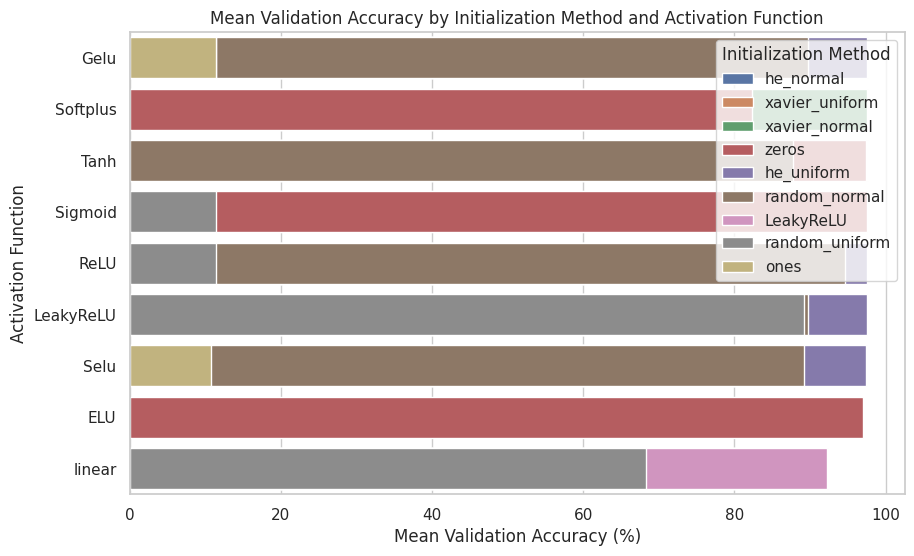

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plot
sns.set(style="whitegrid")

# Creating the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='val_accuracy', y='activation_function', hue='initialization_method', data=sorted_combinations, dodge=False)

plt.xlabel('Mean Validation Accuracy (%)')
plt.ylabel('Activation Function')
plt.title('Mean Validation Accuracy by Initialization Method and Activation Function')
plt.legend(title='Initialization Method')

# Displaying the plot
plt.show()


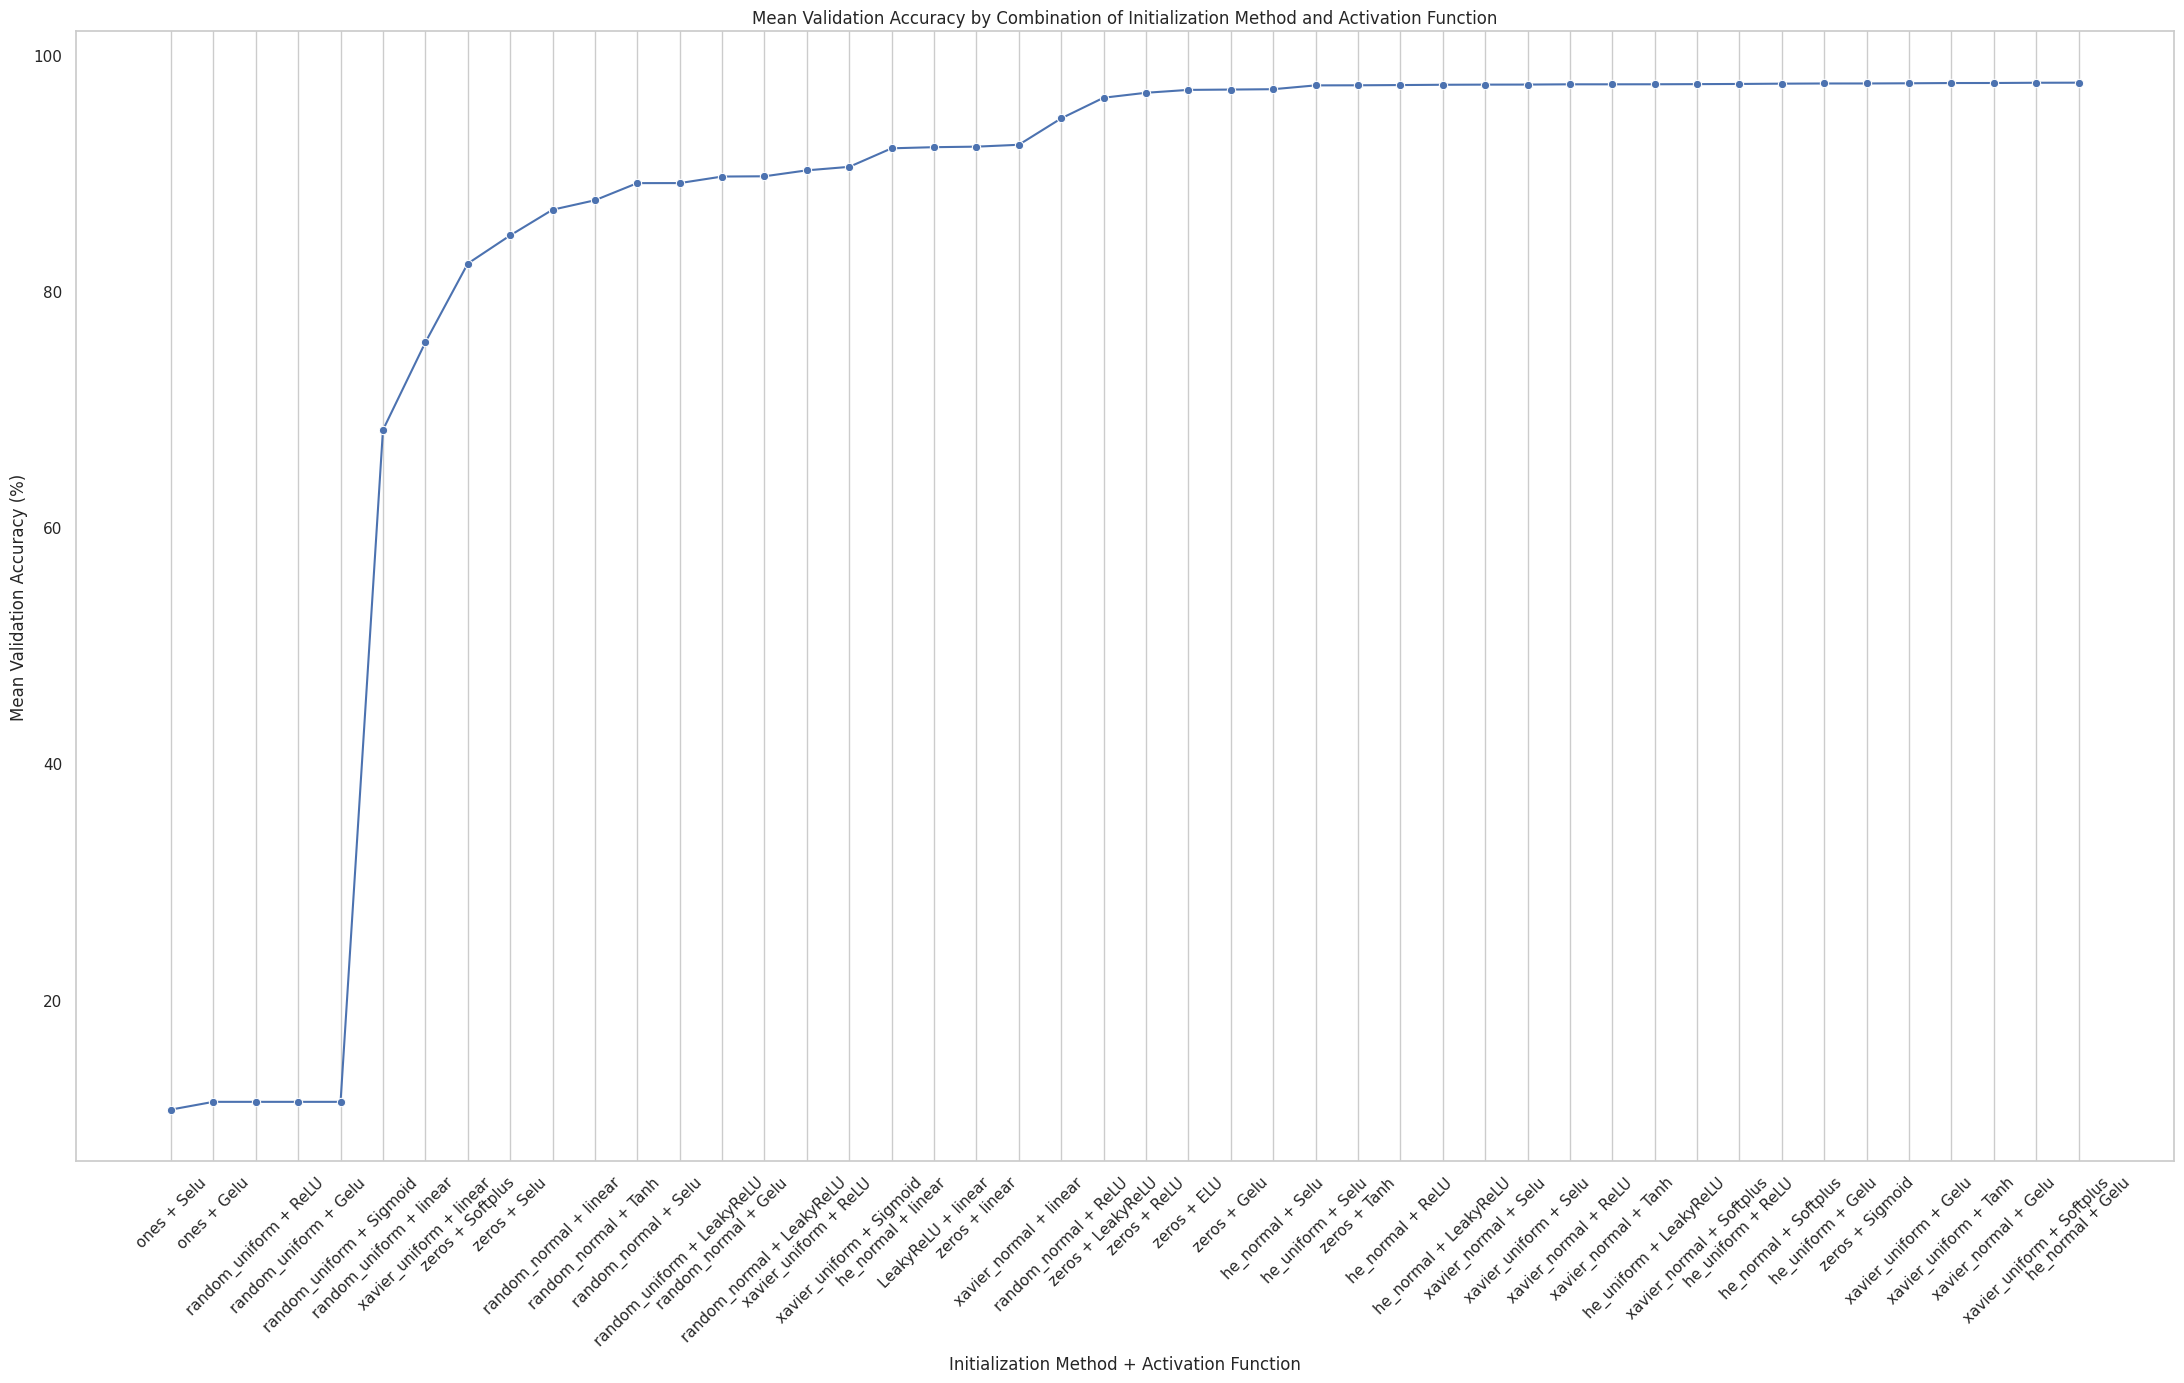

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combining initialization method and activation function into a single string for each row
df['init_act_combination'] = df['initialization_method'] + " + " + df['activation_function']

# Grouping by the new combined column and calculating mean validation accuracy
combined_accuracy = df.groupby('init_act_combination')['val_accuracy'].mean().reset_index()

# Sorting the DataFrame for a more logical plot presentation
combined_accuracy_sorted = combined_accuracy.sort_values('val_accuracy', ascending=True)

# Creating the line plot
plt.figure(figsize=(22, 14))
sns.lineplot(x='init_act_combination', y='val_accuracy', data=combined_accuracy_sorted, marker='o')

plt.xticks(rotation=45)
plt.xlabel('Initialization Method + Activation Function')
plt.ylabel('Mean Validation Accuracy (%)')
plt.title('Mean Validation Accuracy by Combination of Initialization Method and Activation Function')
plt.grid(axis='y')

# Displaying the plot
plt.tight_layout() # Adjust layout to make room for the rotated x-axis labels
plt.show()


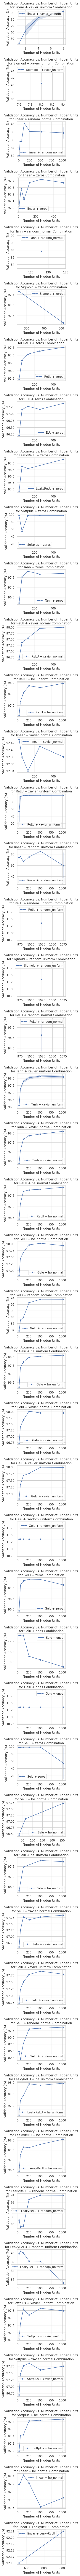

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Combining activation function and initialization method into a single string for each row
df['act_init_combination'] = df['activation_function'] + " + " + df['initialization_method']

# Getting a list of unique combinations of activation function and initialization method
combinations = df['act_init_combination'].unique()

# Determining the number of subplots needed
n_subplots = len(combinations)

# Creating subplots
fig, axes = plt.subplots(n_subplots, 1, figsize=(4, 3 * n_subplots))

# Checking if there's only one subplot to handle it as a special case (axes array will not be an array if n_subplots is 1)
if n_subplots == 1:
    axes = [axes]

# Looping over each combination to create a subplot
for i, combination in enumerate(combinations):
    # Filtering the DataFrame for the current combination
    subset = df[df['act_init_combination'] == combination]
    
    # Plotting
    sns.lineplot(ax=axes[i], x='num_of_hidden_units', y='val_accuracy', data=subset, marker='o', label=combination)
    
    # Setting the title and labels
    axes[i].set_title(f'Validation Accuracy vs. Number of Hidden Units\nfor {combination} Combination')
    axes[i].set_xlabel('Number of Hidden Units')
    axes[i].set_ylabel('Validation Accuracy (%)')
    axes[i].legend()

# Adjust layout to make room for the titles and x-axis labels
plt.tight_layout()
plt.show()


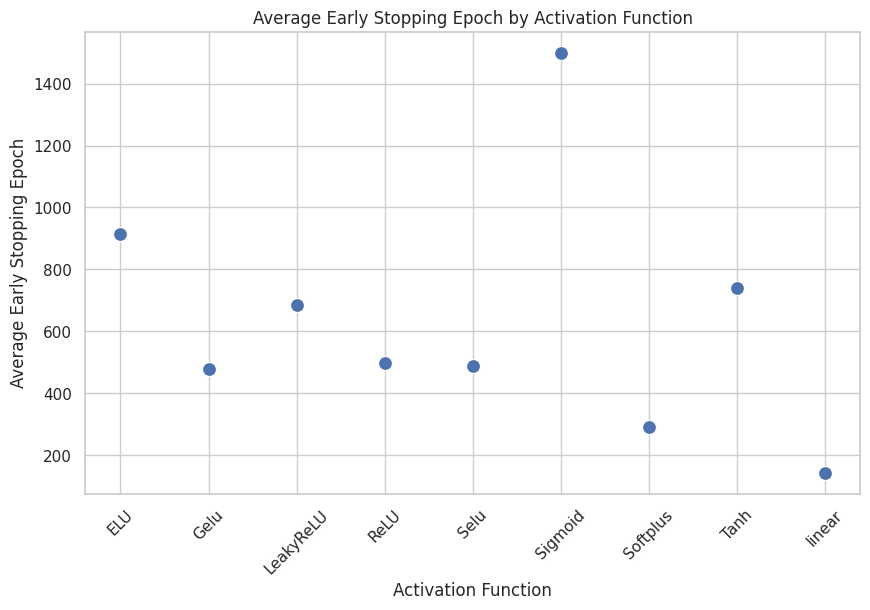

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Calculating mean early stopping epoch for each activation function
mean_early_stopping_by_activation = df.groupby('activation_function')['early_stopping_epoch'].mean().reset_index()

# Creating the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mean_early_stopping_by_activation, x='activation_function', y='early_stopping_epoch', s=100)

plt.xlabel('Activation Function')
plt.ylabel('Average Early Stopping Epoch')
plt.title('Average Early Stopping Epoch by Activation Function')
plt.xticks(rotation=45)  # Rotate labels to avoid overlap

# Display the plot
plt.show()


/tmp/ipykernel_16721/2710513651.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(grouped_data['activation_function'], rotation=45)


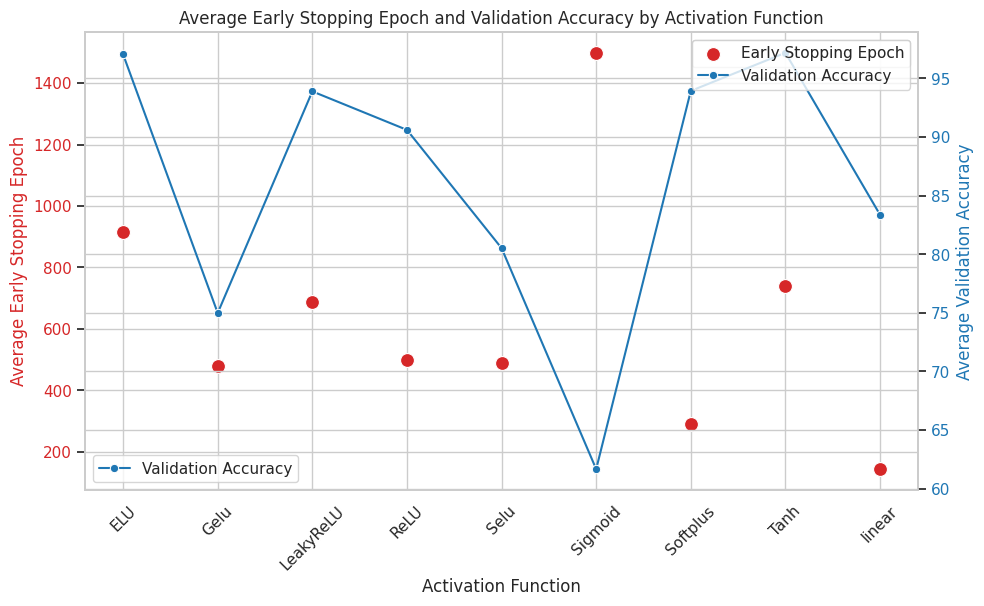

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Calculating mean early stopping epoch and validation accuracy for each activation function
grouped_data = df.groupby('activation_function').agg({'early_stopping_epoch': 'mean', 'val_accuracy': 'mean'}).reset_index()

# Creating figure and axis objects with subplots()
fig, ax1 = plt.subplots(figsize=(10, 6))

# Scatter plot for Early Stopping Epoch
color = 'tab:red'
ax1.set_xlabel('Activation Function')
ax1.set_ylabel('Average Early Stopping Epoch', color=color)
sns.scatterplot(data=grouped_data, x='activation_function', y='early_stopping_epoch', s=100, ax=ax1, color=color, label='Early Stopping Epoch')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(grouped_data['activation_function'], rotation=45)

# Creating a twin axis for the validation accuracy line plot
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Average Validation Accuracy', color=color)
sns.lineplot(data=grouped_data, x='activation_function', y='val_accuracy', ax=ax2, color=color, marker='o', label='Validation Accuracy')
ax2.tick_params(axis='y', labelcolor=color)

# Adding a legend
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.title('Average Early Stopping Epoch and Validation Accuracy by Activation Function')
plt.show()
